<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [3]:
!pip install seaborn

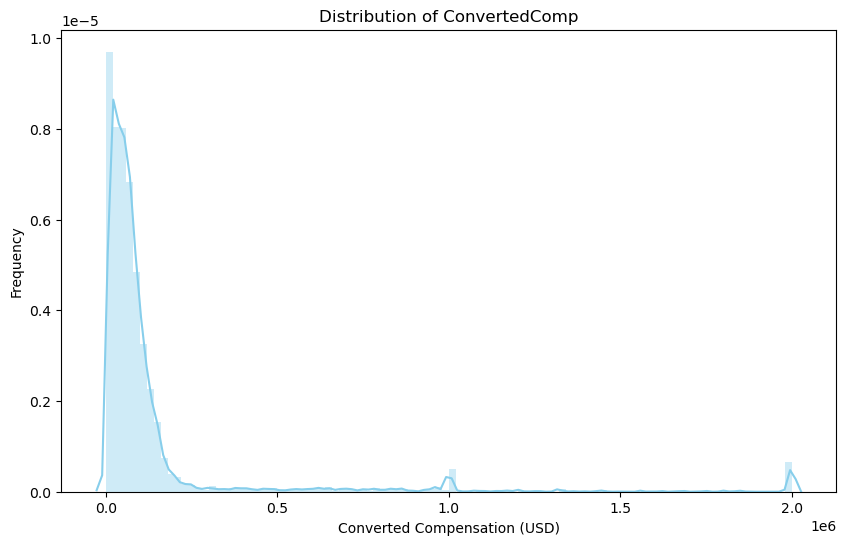

In [4]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv')

# Plotting the distribution curve
plt.figure(figsize=(10, 6))
sns.distplot(df['ConvertedComp'], kde=True, bins=100, color='skyblue')
plt.title('Distribution of ConvertedComp')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.show()


Plot the histogram for the column `ConvertedComp`.


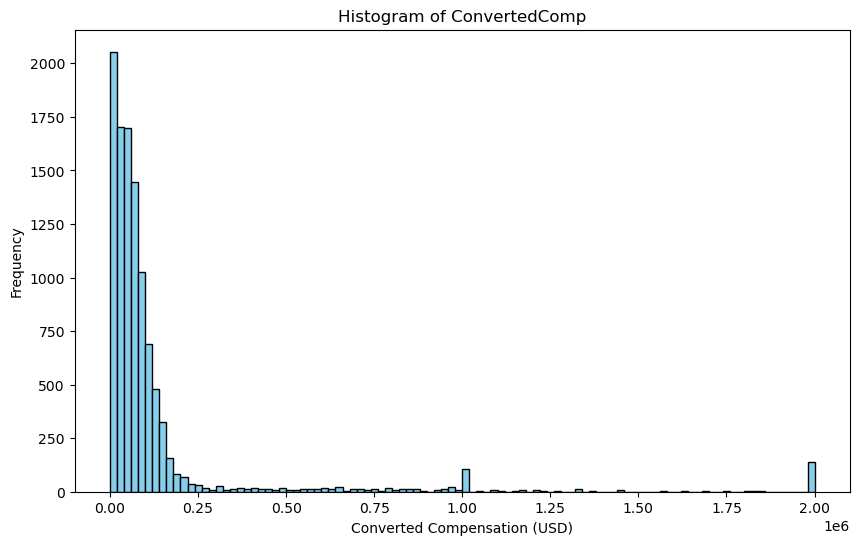

In [5]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame with the column ConvertedComp
# Replace 'your_data.csv' with the actual file path or data source
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv')

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of ConvertedComp')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.show()


What is the median of the column `ConvertedComp`?


In [6]:
# your code goes her
median_value = df['ConvertedComp'].median()
median_value

57745.0

How many responders identified themselves only as a **Man**?


In [7]:
# your code goes here
male_responder_counts = df[df['Gender']=='Man'].shape[0]
print(male_responder_counts)

10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
# your code goes here
median_woman_compensation = df[df['Gender']=='Woman']['ConvertedComp'].median()
median_woman_compensation

57708.0

In [20]:
median_respondents_age = df['Age'].median()
print(median_respondents_age)

29.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
# your code goes here
five_number_summary_age = df['Age'].describe(percentiles=[0.25, 0.5, 0.75])
print(five_number_summary_age)

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


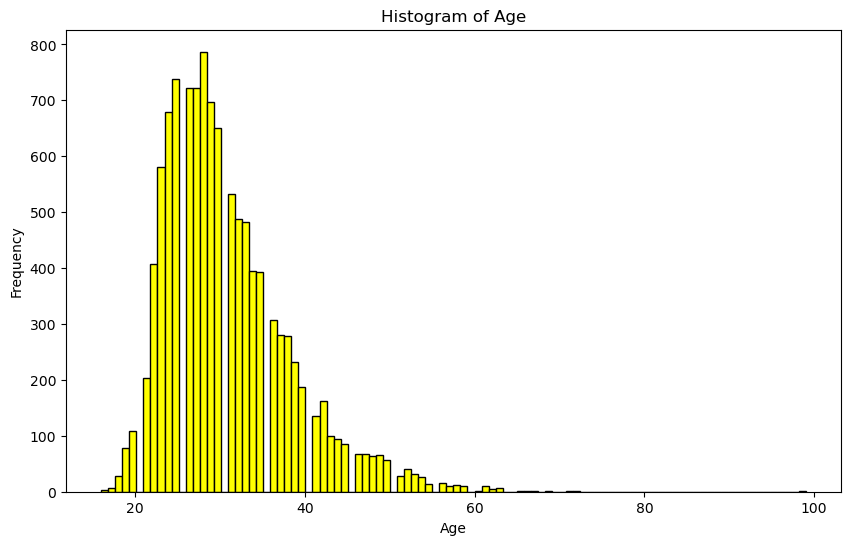

In [12]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv')

plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=100, color='yellow', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


In [21]:
import pandas as pd

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv')

# Calculate the median ConvertedComp before removing outliers
median_before_outliers = df['ConvertedComp'].median()

print(f"The median 'ConvertedComp' before removing outliers is: {median_before_outliers}")


The median 'ConvertedComp' before removing outliers is: 57745.0


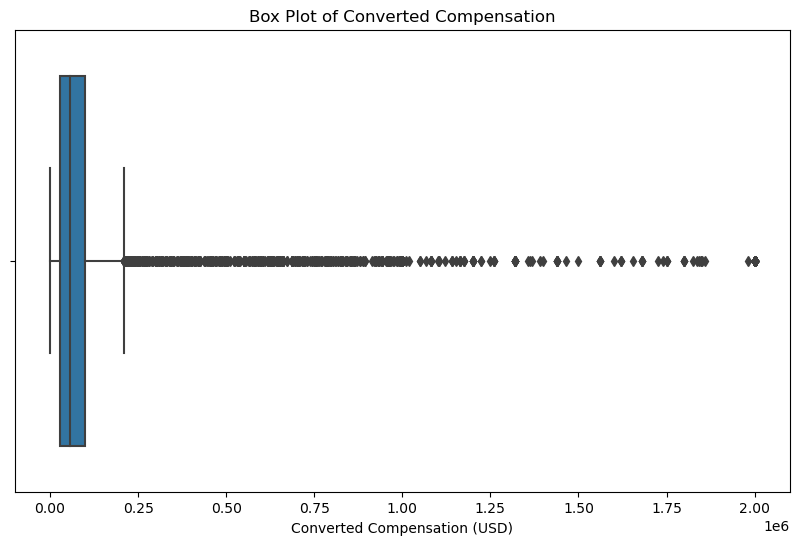

In [14]:
# your code goes here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv')

plt.figure(figsize=(10, 6))
sns.boxplot(x='ConvertedComp', data=df)
plt.title('Box Plot of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [22]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv')

# Calculate the first and third quartiles
Q1 = np.percentile(df['ConvertedComp'].dropna(), 25)
Q3 = np.percentile(df['ConvertedComp'].dropna(), 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate upper and lower bounds for potential outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Create a new DataFrame without outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Calculate the median 'ConvertedComp' after removing outliers
median_after_outliers = df_no_outliers['ConvertedComp'].median()

print(f"The median 'ConvertedComp' after removing outliers is: {median_after_outliers}")


The median 'ConvertedComp' after removing outliers is: 52704.0


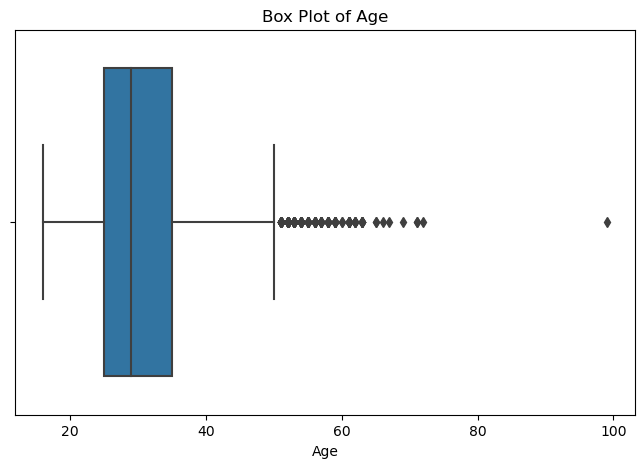

The number of outliers below Q1 in the 'Age' column is: 0


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv')

# Create a boxplot for the 'Age' column
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

# Calculate Q1 and IQR for the 'Age' column
Q1 = df['Age'].quantile(0.25)
IQR = df['Age'].quantile(0.75) - Q1

# Calculate the number of outliers below Q1
outliers_below_Q1 = df[df['Age'] < (Q1 - 1.5 * IQR)]

num_outliers_below_Q1 = len(outliers_below_Q1)
print(f"The number of outliers below Q1 in the 'Age' column is: {num_outliers_below_Q1}")


In [15]:
# your code goes here
import pandas as pd
import numpy as np

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv')

# Calculate the first and third quartiles
Q1 = np.percentile(df['ConvertedComp'].dropna(), 25)
Q3 = np.percentile(df['ConvertedComp'].dropna(), 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

print(f"The Interquartile Range (IQR) for the 'ConvertedComp' column is: {IQR}")


The Interquartile Range (IQR) for the 'ConvertedComp' column is: 73132.0


Find out the upper and lower bounds.


In [16]:
# your code goes here
import pandas as pd
import numpy as np

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv')

# Calculate the first and third quartiles
Q1 = np.percentile(df['ConvertedComp'].dropna(), 25)
Q3 = np.percentile(df['ConvertedComp'].dropna(), 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate upper and lower bounds for potential outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print(f"The upper bound for potential outliers is: {upper_bound}")
print(f"The lower bound for potential outliers is: {lower_bound}")


The upper bound for potential outliers is: 209698.0
The lower bound for potential outliers is: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [24]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv')

# Calculate the first and third quartiles
Q1 = np.percentile(df['ConvertedComp'].dropna(), 25)
Q3 = np.percentile(df['ConvertedComp'].dropna(), 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate upper and lower bounds for potential outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Create a new DataFrame without outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Calculate the mean 'ConvertedComp' after removing outliers
mean_after_outliers = df_no_outliers['ConvertedComp'].mean()

print(f"The mean 'ConvertedComp' after removing outliers is: {mean_after_outliers}")


The mean 'ConvertedComp' after removing outliers is: 59883.20838915799


In [17]:
# your code goes here
import pandas as pd
import numpy as np

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv')

# Calculate the first and third quartiles
Q1 = np.percentile(df['ConvertedComp'].dropna(), 25)
Q3 = np.percentile(df['ConvertedComp'].dropna(), 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate upper and lower bounds for potential outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outliers
outliers = df[(df['ConvertedComp'] > upper_bound) | (df['ConvertedComp'] < lower_bound)]

# Count the number of outliers
num_outliers = len(outliers)

print(f"The number of outliers in the 'ConvertedComp' column is: {num_outliers}")


The number of outliers in the 'ConvertedComp' column is: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [18]:
# your code goes here
import pandas as pd
import numpy as np

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv')

# Calculate the first and third quartiles
Q1 = np.percentile(df['ConvertedComp'].dropna(), 25)
Q3 = np.percentile(df['ConvertedComp'].dropna(), 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate upper and lower bounds for potential outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Create a new DataFrame without outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Display the new DataFrame without outliers
print(df_no_outliers)


       Respondent                      MainBranch Hobbyist  \
0               4  I am a developer by profession       No   
1               9  I am a developer by profession      Yes   
2              13  I am a developer by profession      Yes   
4              17  I am a developer by profession      Yes   
5              19  I am a developer by profession      Yes   
...           ...                             ...      ...   
11392       25134  I am a developer by profession      Yes   
11393       25136  I am a developer by profession      Yes   
11394       25137  I am a developer by profession      Yes   
11395       25138  I am a developer by profession      Yes   
11396       25141  I am a developer by profession      Yes   

                                             OpenSourcer  \
0                                                  Never   
1                             Once a month or more often   
2      Less than once a month but more than once per ...   
4      Less tha

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [19]:
# your code goes here
import pandas as pd

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv')

# Select the 'Age' column and all other numerical columns
numerical_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corrwith(df['Age'])

# Display the correlation values
print(correlation_matrix)


Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
